In [22]:
# importing libraries used in this book
import numpy as np
import pandas as pd
import math
import deeplabcut
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 6
%matplotlib inline

In [20]:
from FunctionsLib import corruption_data 
path = 'Horses-Byron-2019-05-08'
original = f'{path}/labeled-data-correct/BrownHorseinShadow/CollectedData_Byron.csv'
target_csv = f'{path}/labeled-data/BrownHorseinShadow/CollectedData_Byron.csv'
target_h5 = f'{path}/labeled-data/BrownHorseinShadow/CollectedData_Byron.h5'

path_config_file = f'{path}/config.yaml'
# read the configure file - config.yaml
cfg = deeplabcut.auxiliaryfunctions.read_config(path_config_file)
# get the scorer name / bodyparts
scorer = cfg['scorer']
bodyparts = cfg['bodyparts']

'''
reference: import csv with multi-index 
[https://medium.com/@gotashirato/how-to-import-csv-file-with-multi-level-columns-python-basics-and-a-question-b67cbbbc174d]
In our case, we have 3 indexes -- [scorer, bodyparts, coords],
so header is [0, 1, 2]
and set the index_col=0
'''

# we corrupt the Nose, Nearfrontfoot, Shoulder, Wither, and Hip
# The withers is the ridge between the shoulder blades of an animal, typically a quadruped. 
df, corrupted = corruption_data(original,scorer,bodyparts,[0,4,8,12,16],10)
print(corrupted)

# save the file -- *.csv/*.h5
df.to_csv(target_csv)
df.to_hdf(target_h5, "df_with_missing", format='table', mode='w')
#df

['labeled-data/BrownHorseinShadow/0304.png', 'labeled-data/BrownHorseinShadow/0108.png', 'labeled-data/BrownHorseinShadow/0123.png', 'labeled-data/BrownHorseinShadow/0292.png', 'labeled-data/BrownHorseinShadow/0171.png', 'labeled-data/BrownHorseinShadow/0223.png', 'labeled-data/BrownHorseinShadow/0201.png', 'labeled-data/BrownHorseinShadow/0079.png', 'labeled-data/BrownHorseinShadow/0354.png', 'labeled-data/BrownHorseinShadow/0053.png']


In [21]:
# check corrupted labels using deeplabcut's function check_labels
deeplabcut.check_labels(r'Horses-Byron-2019-05-08\config.yaml')

Creating images with labels by Byron.
Horses-Byron-2019-05-08\labeled-data\BrownHorseintoshadow_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 289/289 [00:40<00:00,  7.22it/s]


Horses-Byron-2019-05-08\labeled-data\Brownhorselight_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 306/306 [00:40<00:00,  7.49it/s]


Horses-Byron-2019-05-08\labeled-data\Brownhorseoutofshadow_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 341/341 [00:41<00:00,  8.25it/s]


Horses-Byron-2019-05-08\labeled-data\ChestnutHorseLight_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 318/318 [02:07<00:00,  2.50it/s]


Horses-Byron-2019-05-08\labeled-data\Chestnuthorseongrass_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 376/376 [00:50<00:00,  7.47it/s]


Horses-Byron-2019-05-08\labeled-data\GreyHorseLightandShadow_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 356/356 [00:40<00:00,  8.82it/s]


Horses-Byron-2019-05-08\labeled-data\GreyHorseNoShadowBadLight_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 286/286 [00:33<00:00,  8.51it/s]


Horses-Byron-2019-05-08\labeled-data\Sample1_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:20<00:00,  8.65it/s]


Horses-Byron-2019-05-08\labeled-data\Sample10_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 235/235 [00:28<00:00,  8.13it/s]


Horses-Byron-2019-05-08\labeled-data\Sample11_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:30<00:00,  8.41it/s]


Horses-Byron-2019-05-08\labeled-data\Sample12_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:35<00:00,  8.23it/s]


Horses-Byron-2019-05-08\labeled-data\Sample13_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 244/244 [00:29<00:00,  8.26it/s]


Horses-Byron-2019-05-08\labeled-data\Sample14_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:22<00:00,  7.33it/s]


Horses-Byron-2019-05-08\labeled-data\Sample15_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 154/154 [00:18<00:00,  8.33it/s]


Horses-Byron-2019-05-08\labeled-data\Sample16_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 212/212 [00:26<00:00,  7.90it/s]


Horses-Byron-2019-05-08\labeled-data\Sample17_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:27<00:00,  8.62it/s]


Horses-Byron-2019-05-08\labeled-data\Sample18_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [00:21<00:00,  7.34it/s]


Horses-Byron-2019-05-08\labeled-data\Sample19_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:17<00:00,  7.83it/s]


Horses-Byron-2019-05-08\labeled-data\Sample2_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 330/330 [00:39<00:00,  8.31it/s]


Horses-Byron-2019-05-08\labeled-data\Sample20_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:21<00:00,  8.46it/s]


Horses-Byron-2019-05-08\labeled-data\Sample3_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 342/342 [00:46<00:00,  7.40it/s]


Horses-Byron-2019-05-08\labeled-data\Sample4_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 305/305 [00:34<00:00,  8.78it/s]


Horses-Byron-2019-05-08\labeled-data\Sample5_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 295/295 [00:38<00:00,  7.68it/s]


Horses-Byron-2019-05-08\labeled-data\Sample6_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 376/376 [00:47<00:00,  7.90it/s]


Horses-Byron-2019-05-08\labeled-data\Sample7_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:30<00:00,  8.62it/s]


Horses-Byron-2019-05-08\labeled-data\Sample8_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 388/388 [00:46<00:00,  8.35it/s]


Horses-Byron-2019-05-08\labeled-data\Sample9_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:43<00:00,  8.17it/s]


Horses-Byron-2019-05-08\labeled-data\TwoHorsesinvideobothmoving_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 181/181 [00:20<00:00,  8.74it/s]


Horses-Byron-2019-05-08\labeled-data\Twohorsesinvideoonemoving_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 252/252 [00:33<00:00,  7.43it/s]


Horses-Byron-2019-05-08\labeled-data\BrownHorseinShadow_labeled  already exists!


100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [00:35<00:00,  8.63it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


0304


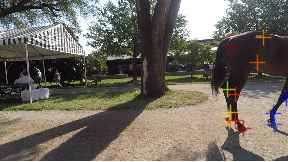

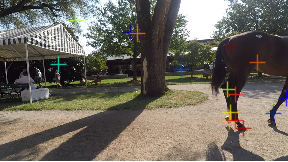

0108


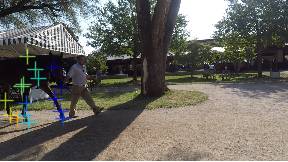

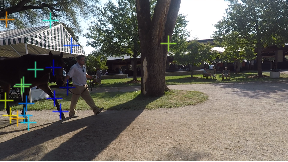

0123


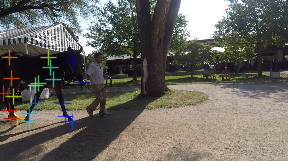

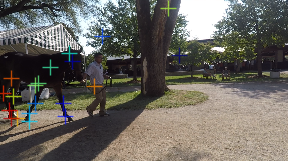

0292


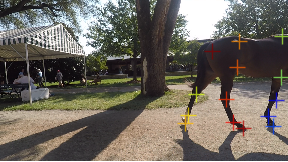

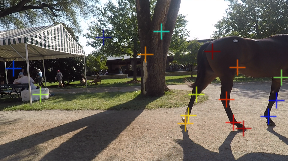

0171


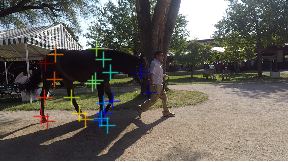

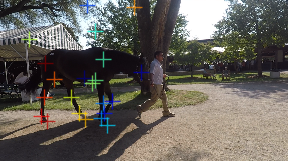

0223


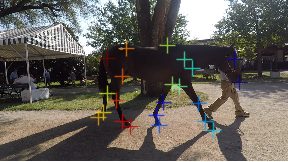

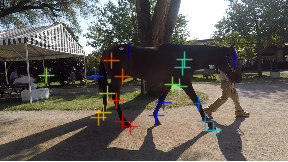

0201


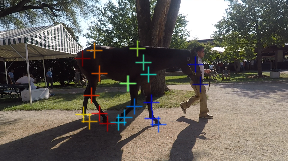

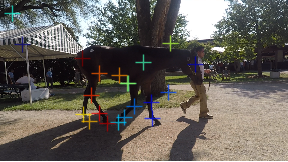

0079


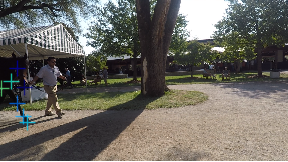

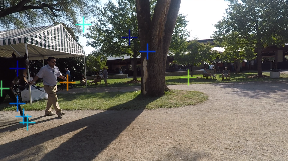

0354


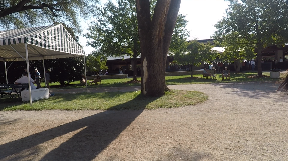

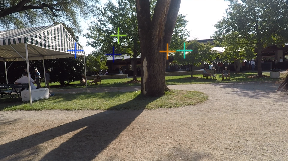

0053


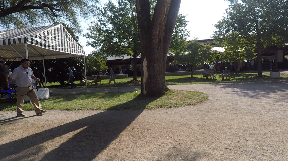

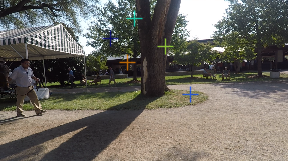

In [23]:
# display correct and corrupted labeled frames
for name in corrupted:
    string = "".join(re.findall(r'\d',name))
    id = string
    print(id)
    display(Image(filename=f'{path}/labeled-data-correct/BrownHorseinShadow_labeled/' +id+'_bodypart.png'))
    display(Image(filename=f'{path}/labeled-data/BrownHorseinShadow_labeled/'+id+'_bodypart.png'))

In [24]:
# check if there are any NaN values
nan_rows = df[df.isna().any(axis=1)]
#print(nan_rows) # normal since horse comes from out of the frame and leaves it too
#display(Image(filename=f'{path}/labeled-data/BrownHorseinShadow_labeled/img0109_bodypart.png'))
#display(Image(filename=f'{path}/labeled-data/BrownHorseinShadow_labeled/img0110_bodypart.png'))

In [44]:
# plot trajectories of the points to see if continuous ?

# not a really good idea actually

In [25]:
from FunctionsLib import distance_keypoints,clean_dataset

# the bodyparts that keep the same distance between them would be for example Nose(0)-Eye(1) and Girth(11)-Wither(12)
# we could compute all the distances that should not change much

df = pd.read_hdf(target_h5)
dist = distance_keypoints(df,'Nose','Eye')

data = pd.DataFrame(data=dist, index=df.index, columns=None)
data.columns = ['distance eye - nose']

# remove any NaN values from our distances dataset
data = clean_dataset(data)

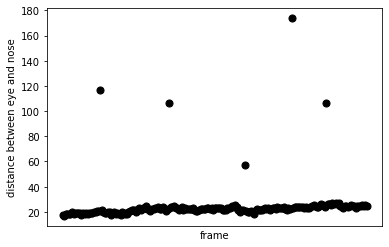

In [26]:
plt.scatter(data.index, data, s = 50, c = 'black')

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('distance between eye and nose')
plt.xlabel('frame')

plt.show()

In [27]:
df = pd.read_hdf(target_h5)
dist = distance_keypoints(df,'Girth','Wither')

data = pd.DataFrame(data=dist, index=df.index, columns=None)
data.columns = ['distance girth - wither']

# remove any NaN values from our distances dataset
data = clean_dataset(data)

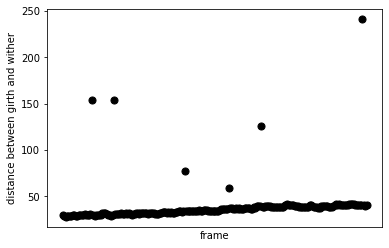

In [28]:
plt.scatter(data.index, data, s = 50, c = 'black')

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('distance between girth and wither')
plt.xlabel('frame')

plt.show()

In [31]:
# now for the angles
from FunctionsLib import getAngle
# look for frames where bodyparts might have been swapped
df = pd.read_hdf(target_h5)
eye = df.xs('Eye', level='bodyparts', axis=1).to_numpy()
nose = df.xs('Nose', level='bodyparts', axis=1).to_numpy()
girth = df.xs('Girth', level='bodyparts', axis=1).to_numpy()

all_frames =[]
swapped_frames = []
#not_swapped = []
for (a,b,c) in zip(girth,eye,nose):
    all_frames.append(getAngle(a,b,c))
    if getAngle(a,b,c) < 0:
        swapped_frames.append(getAngle(a,b,c))
    #else:
        #not_swapped.append(getAngle(a,b,c))
#print(swapped_frames)

In [32]:
data = pd.DataFrame(data=all_frames, index=df.index, columns=None)
data = clean_dataset(data)
data.columns = ['angle between nose and girth']
data.head()

,angle between nose and girth
labeled-data/BrownHorseinShadow/0081.png,-56.952584
labeled-data/BrownHorseinShadow/0082.png,-56.113515
labeled-data/BrownHorseinShadow/0083.png,-60.700753
labeled-data/BrownHorseinShadow/0084.png,-58.826140
labeled-data/BrownHorseinShadow/0085.png,-59.240998


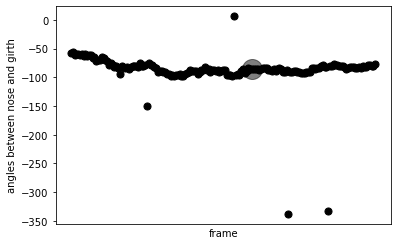

In [40]:
plt.scatter(data.index, data, s = 50, c = 'black')
#plt.scatter(56, 118.28695027, s=300, c='r', marker='s')

'''
for row in data.iterrows():
    if float(row[1]) < 80: #kind of a random treshold based on the data, need to find better
        string = "".join(re.findall(r'\d',row[0]))
        id = string[3:]
        plt.text(row[0], row[1]*(1.015), str(id))
'''

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
plt.ylabel('angles between nose and girth')
plt.xlabel('frame')
plt.scatter(100, -86.29836564, c='black', s=400, alpha=0.5)

plt.show()

In [34]:
# defining the kmeans function
kmeans = KMeans(n_clusters=1)

# fitting the k means algorithm on data
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

In [37]:
centers = kmeans.cluster_centers_
print(centers)

[[-86.29836564]]
